# COGS 108 - Final Project 

# Overview

I took a look at health inspection scores of restaurants in various zip codes, and wanted to see if I could predict the average score of a zip code based on income information from that zip code. I found that per capita income was not a predictor of the average health inspection score.

# Name & PID

- Name: Samuel Givens
- PID: A13160655

# Research Question

Is there a correlation between local income and average health inspection scores? 

## Background and Prior Work

There are approximately 14,000 retail food establishments in San Diego County. Random, unannounced health inspections are conducted regularly by the San Diego County Department of Environmental Health. Food facilities are scored out of 100, and there are 3 categories of violations: Major Risk Factors, Minor Risk Factors, and Good Retail Practices. For every Major Risk Factor, 4 points are deducted from the score. Similarly, 2 points are deducted for Minor Risk Factors and 1 point for every Good Retail Practice that is not followed. A score of 90 or above receives an "A" grade, 80-89 receives a "B", and anything below 80 receives a failing grade of "C". [1]

The effectiveness of health inspections has come into question. In one study of health inspection scores conducted in Tennesee, researchers revealed inconsistencies in the way that different inspectors scored restaurants, suggesting that biases could come into play in the inspection process [3]. NBC 7 found that 99% of San Diego restaurants received an "A" grade between 2014 and 2017, suggesting that the county may be too lenient in its grading system [4].

References:

1) https://www.sandiegocounty.gov/content/sdc/deh/fhd/ffis/intro.html.html
2) https://www.sdfoodinfo.org/restaurant.html
3) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3323064/
4) https://www.nbcsandiego.com/news/local/99-of-san-diego-restaurants-earn-a-grades-bringing-usefulness-of-system-into-question/25381/

# Hypothesis


My hypothesis is that zip codes with a lower per capita income will have lower average restaurant health inspection scores than zip codes with higher per capita incomes. This is because poorer communities are historically underserved, and they may not have adequate resources and training to be in compliance with health regulations.

# Dataset(s)

inspections.csv
- Link to dataset: data/inspections.csv
- Number of observations: 18,466

This dataset contains information about restaurants, their locations, and the result of their health inspection (score, number of violations of various categories). It also has information about previous inspections.


zipcodes.csv
- Link to dataset: data/zipcodes.csv
- Number of observations: 38

This dataset contains demographic information about various zip codes, such as: median family income, median household income, per capita income, percent of families below the poverty line, percent of people receiving snap benefits, percent of people receiving supplemental security income, and percent of the population that is nonwhite.



I plan to combine these datasets by taking the average of health inspection scores for each zip code, and merging it with the demographic information for that zip code.

# Setup

In [1]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm

# Data Cleaning

Describe your data cleaning steps here.

In [2]:
# Load in datasets and explore the data
df_inspections = pd.read_csv('data/inspections.csv')
df_zipcodes = pd.read_csv('data/zipcodes.csv')

df_zipcodes.head()

,zip,median_family_income_dollars,median_household_income_dollars,per_capita_income_dollars,percent_damilies_below_poverty_line,percent_snap_benefits,percent_supplemental_security_income,percent_nonwhite
0,27501,59408,51121,21631,10.5,15.5,5.2,17.9
1,27502,109891,95857,36763,3.4,2.4,0.8,18.9
2,27511,82292,67392,33139,9.6,4.5,2.2,24.8
3,27513,109736,87262,41232,3.8,2.4,1.5,27.8
4,27518,125432,98247,49865,5.5,1.0,1.7,19.9


In [3]:
# Drop all columns from inspections other than the zip codes and the health inspection scores
df_inspections = df_inspections[['postalcode', 'score']]
df_inspections.columns = ['zip', 'score']

# Get the average health inspection score of each zip code. Some zip codes have the format xxxxx-xxxx, but we want the
# average for every 5-digit zip code
zip_scores = df_inspections.groupby(df_inspections['zip'].str[:5]).mean()
zip_scores.columns = ['average_health_inspection_score']
zip_scores.shape

(51, 1)

In [4]:
# Merge the two dataframes together
df_zipcodes['zip'] = df_zipcodes['zip'].astype(str)
zip_data = pd.merge(zip_scores, df_zipcodes, how='inner', on='zip')
zip_data

,zip,average_health_inspection_score,median_family_income_dollars,median_household_income_dollars,per_capita_income_dollars,percent_damilies_below_poverty_line,percent_snap_benefits,percent_supplemental_security_income,percent_nonwhite
0,27501,94.750000,59408,51121,21631,10.5,15.5,5.2,17.9
1,27502,96.367223,109891,95857,36763,3.4,2.4,0.8,18.9
2,27511,96.418969,82292,67392,33139,9.6,4.5,2.2,24.8
3,27513,95.655130,109736,87262,41232,3.8,2.4,1.5,27.8
4,27518,97.225291,125432,98247,49865,5.5,1.0,1.7,19.9
5,27519,96.831412,137193,121815,45778,3.2,2.3,2.3,35.2
6,27520,97.711538,67939,58455,25628,5.0,7.8,2.4,23.5
7,27522,98.250000,66250,59221,25513,6.0,7.0,4.2,31.4
8,27523,96.554795,89184,68342,36976,3.1,3.1,1.8,22.4
9,27526,94.940922,74666,66025,28074,8.4,8.3,3.9,22.5


zip_data now contains all of the information we need to carry out the analysis.

# Data Analysis & Results

Let's take a look at the distribution of health inspection scores across all of our 5-digit zip codes.

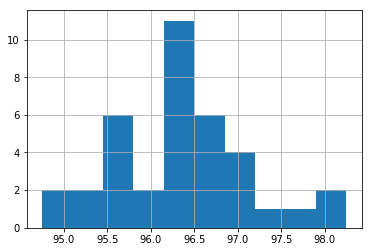

In [5]:
zip_data['average_health_inspection_score'].hist()

And now let's look at the distribution of income per capita.

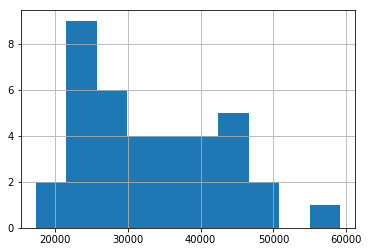

In [6]:
zip_data['per_capita_income_dollars'].hist()

Now let's create a linear model to predict average health inspection score from income per capita.

In [9]:
outcome, predictors = patsy.dmatrices('average_health_inspection_score ~ per_capita_income_dollars', zip_data)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                                   OLS Regression Results                                  
Dep. Variable:     average_health_inspection_score   R-squared:                       0.000
Model:                                         OLS   Adj. R-squared:                 -0.029
Method:                              Least Squares   F-statistic:                  0.001103
Date:                             Wed, 10 Jun 2020   Prob (F-statistic):              0.974
Time:                                     23:37:42   Log-Likelihood:                -42.762
No. Observations:                               37   AIC:                             89.52
Df Residuals:                                   35   BIC:                             92.75
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                                coef    std err          t      P>|t|      [0.02

# Ethics & Privacy

Under California state law, every restaurant must have a copy of their most recent health inspection report available on-site for those who wish to review it. More extensive information is available online through www.sdfoodinfo.org, www.sandiegocounty.gov, or by submitting a public records request through the Food and Housing Division of the County of San Diego Department of Environmental Health.

The function of this study is not to call attention to individual restaurants that may or may not be meeting health and safety standards. The goal is to better inform county health officials so that they may put in place policies and programs that equitably increase the quality of food safety. This may involve providing more support for organizations that have a harder time complying with regulations.

# Conclusion & Discussion

My hypothesis was not supported. Per capita income was not a predictor of average health inspection score.